In [9]:
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from matplotlib import pyplot as plt
import pandas as pd

https://geostat-framework.readthedocs.io/projects/pykrige/en/latest/overview.html#ordinary-kriging-example

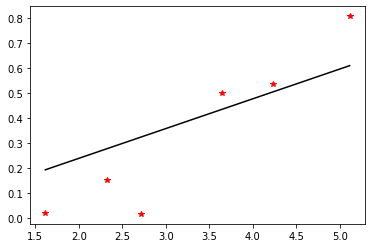

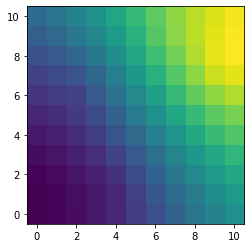

In [2]:
data = np.array([[0.3, 1.2, 0.47],
                 [1.9, 0.6, 0.56],
                 [1.1, 3.2, 0.74],
                 [3.3, 4.4, 1.47],
                 [4.7, 3.8, 1.74]])

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. If no variogram model is specified, defaults to a linear variogram
# model. If no variogram model parameters are specified, then the code automatically
# calculates the parameters by fitting the variogram model to the binned
# experimental semivariogram. The verbose kwarg controls code talk-back, and
# the enable_plotting kwarg controls the display of the semivariogram.
OK = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model='linear',
                     verbose=False, enable_plotting=True)

# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See OrdinaryKriging.__doc__ for more information.)
z, ss = OK.execute('grid', gridx, gridy)

plt.imshow(z, origin="lower")

In [3]:
# setup firebase
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account
cred = credentials.Certificate('./firebase/serviceAccount.json')
firebase_admin.initialize_app(cred)

db = firestore.client()

In [17]:

docs = db.collection(u'readings').stream()
data = []

for doc in docs:
    vals = doc.to_dict()
    print(u'{} => {}\n'.format(doc.id, vals))
    data.append([vals['lat'], vals['long'], vals['dust']])

    
print(data)


0VPGbMYd7LXcTU1KUIZ2 => {'lat': 55.9443608, 'ch4': 0.029999999329447746, 'c3h8': 743.8900146484375, 'dust': 40.16999816894531, 'voc': 0.0, 'ch4h10': 498.9700012207031, 'nh3': 0.8100000023841858, 'eco2': 402.0, 'c2h5oh': 0.05000000074505806, 'h2': 0.009999999776482582, 'no2': 0.25999999046325684, 'co': 0.30000001192092896, 'long': -3.1869943}

1rD1C0w3qhT3z0W2AUgF => {'c3h8': 86.08999633789062, 'voc': 0.0, 'dust': 106.62999725341797, 'ch4h10': 82.19000244140625, 'nh3': 0.1899999976158142, 'c2h5oh': 0.029999999329447746, 'eco2': 400.0, 'h2': 0.009999999776482582, 'no2': 0.949999988079071, 'co': 0.20999999344348907, 'long': -3.1860037, 'lat': 55.944467, 'ch4': 0.009999999776482582}

2VLMtIIVUFtfoL6IKAli => {'ch4h10': 781.5999755859375, 'c2h5oh': 0.05999999865889549, 'eco2': 400.0, 'nh3': 1.1299999952316284, 'h2': 0.009999999776482582, 'no2': 0.2199999988079071, 'co': 0.30000001192092896, 'long': -3.1869943, 'lat': 55.9443608, 'ch4': 0.029999999329447746, 'c3h8': 1262.0, 'voc': 0.0, 'dust'

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 5000.297465669254
Full Sill: 6599.7477751823335
Range: 0.0010089077788247153
Nugget: 1599.450309513079 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...

[-3.1870474 -3.1869974 -3.1869474 -3.1868974 -3.1868474 -3.1867974
 -3.1867474 -3.1866974 -3.1866474 -3.1865974 -3.1865474 -3.1864974
 -3.1864474 -3.1863974 -3.1863474 -3.1862974 -3.1862474 -3.1861974
 -3.1861474 -3.1860974 -3.1860474]
[55.9443561 55.9444061 55.9444561]
[ 40.16999817 106.62999725  53.77000046  60.83000183 198.27000427
 139.63000488  62.         180.33000183 119.26999664 188.66999817
  65.09999847 181.69999695  27.22999954  45.93000031 167.52999878
 199.36999512 233.6000061  122.19999695 188.02999878  69.16999817
 192.3999939  102.         125.73000336 231.6000061  142.16999817
 160.27000427 191.66999817  85.12999725 147.5        125.06999969
 227

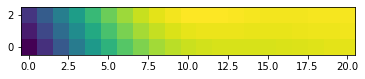

In [18]:
npdata = np.array(data)
df = pd.DataFrame(npdata, columns=['lat', 'long', 'air'])

lons=np.array(df['long']) 
lats=np.array(df['lat'])
air=np.array(df['air'])


grid_space = 0.00005
grid_lon = np.arange(np.amin(lons), np.amax(lons), grid_space) #grid_space is the desired delta/step of the output array 
grid_lat = np.arange(np.amin(lats), np.amax(lats), grid_space)

OK = OrdinaryKriging(lons, lats, air, variogram_model='gaussian', verbose=True, enable_plotting=False,nlags=20)
z1, ss1 = OK.execute('grid', grid_lon, grid_lat)

print(grid_lon)
print(grid_lat)
print(air)

plt.imshow(z1, origin="lower")